In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('seaborn')

/tmp/ipykernel_235664/2217170361.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
path = '../.benchmarks/Linux-CPython-3.10-64bit/0002_pydicom_comparisons.json'

In [3]:
with open(path) as f:
    data = json.load(f)

In [5]:
data.keys()

dict_keys(['machine_info', 'commit_info', 'benchmarks', 'datetime', 'version'])

In [39]:
df = pd.DataFrame(data['benchmarks'])
df['median'] = df.stats.apply(lambda x: x['median'])
df['loader'] = df.name.apply(lambda x: x.split('[')[0])
df = df[['loader', 'param', 'median']]
df = df.set_index(['loader', 'param']).unstack().T.droplevel(0)
df

loader,test_dimble_read,test_gdcm_read,test_pydicom_read,test_sitk_read
param,,,,
693_J2KR.dcm,0.000151,0.007073,0.007451,0.016697
693_UNCI.dcm,0.000143,0.007039,0.001028,0.007817
693_UNCR.dcm,0.000158,0.006518,0.000821,0.007838
JPEG-LL.dcm,0.000166,0.002308,0.003614,0.003468
JPEG2000_UNC.dcm,0.000159,0.000693,0.001148,0.001496
JPGLosslessP14SV1_1s_1f_8b.dcm,0.000201,0.004432,0.005809,0.005275
MR-SIEMENS-DICOM-WithOverlays.dcm,0.000166,0.001285,0.000877,0.003031
MR2_J2KI.dcm,0.000238,0.019485,0.021775,0.023439
MR2_J2KR.dcm,0.000225,0.020333,0.022625,0.025712


<Axes: xlabel='param'>

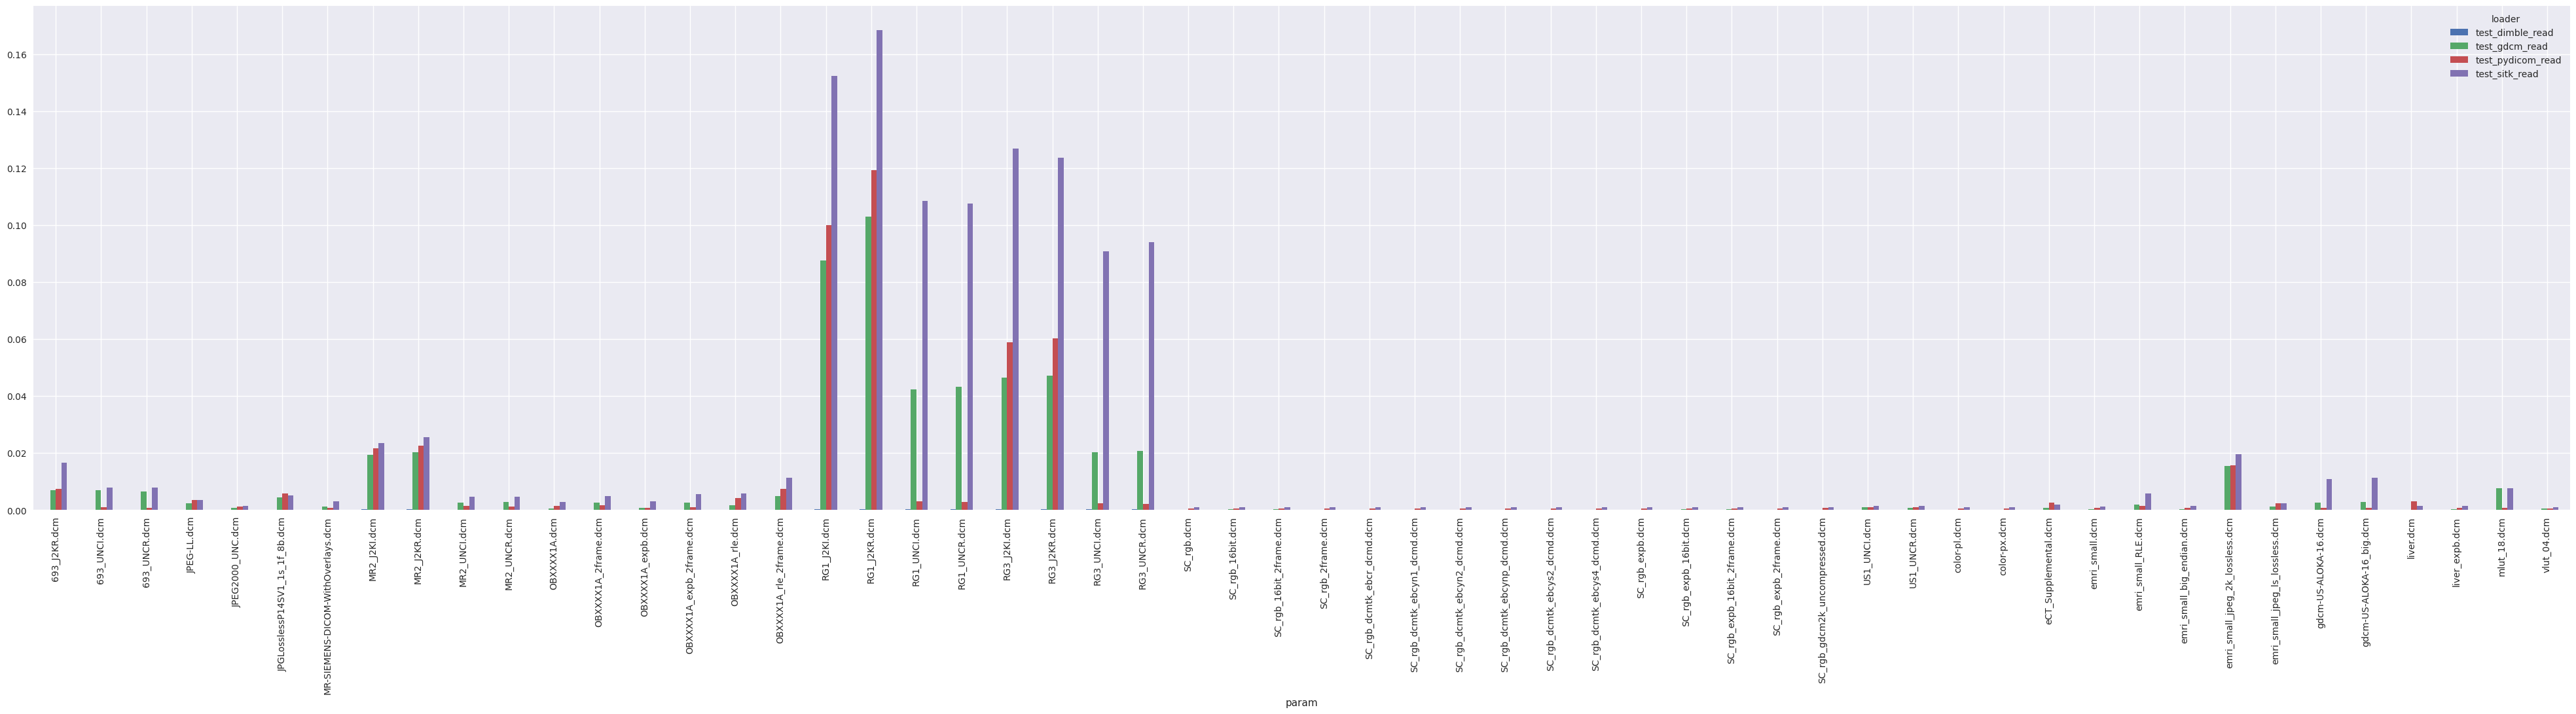

In [42]:
fig, ax = plt.subplots(figsize=(50, 10))
df.plot.bar(ax=ax)

In [57]:
speedups = (df['test_pydicom_read'] / df['test_dimble_read'])

Text(0.5, 0, 'Example File')

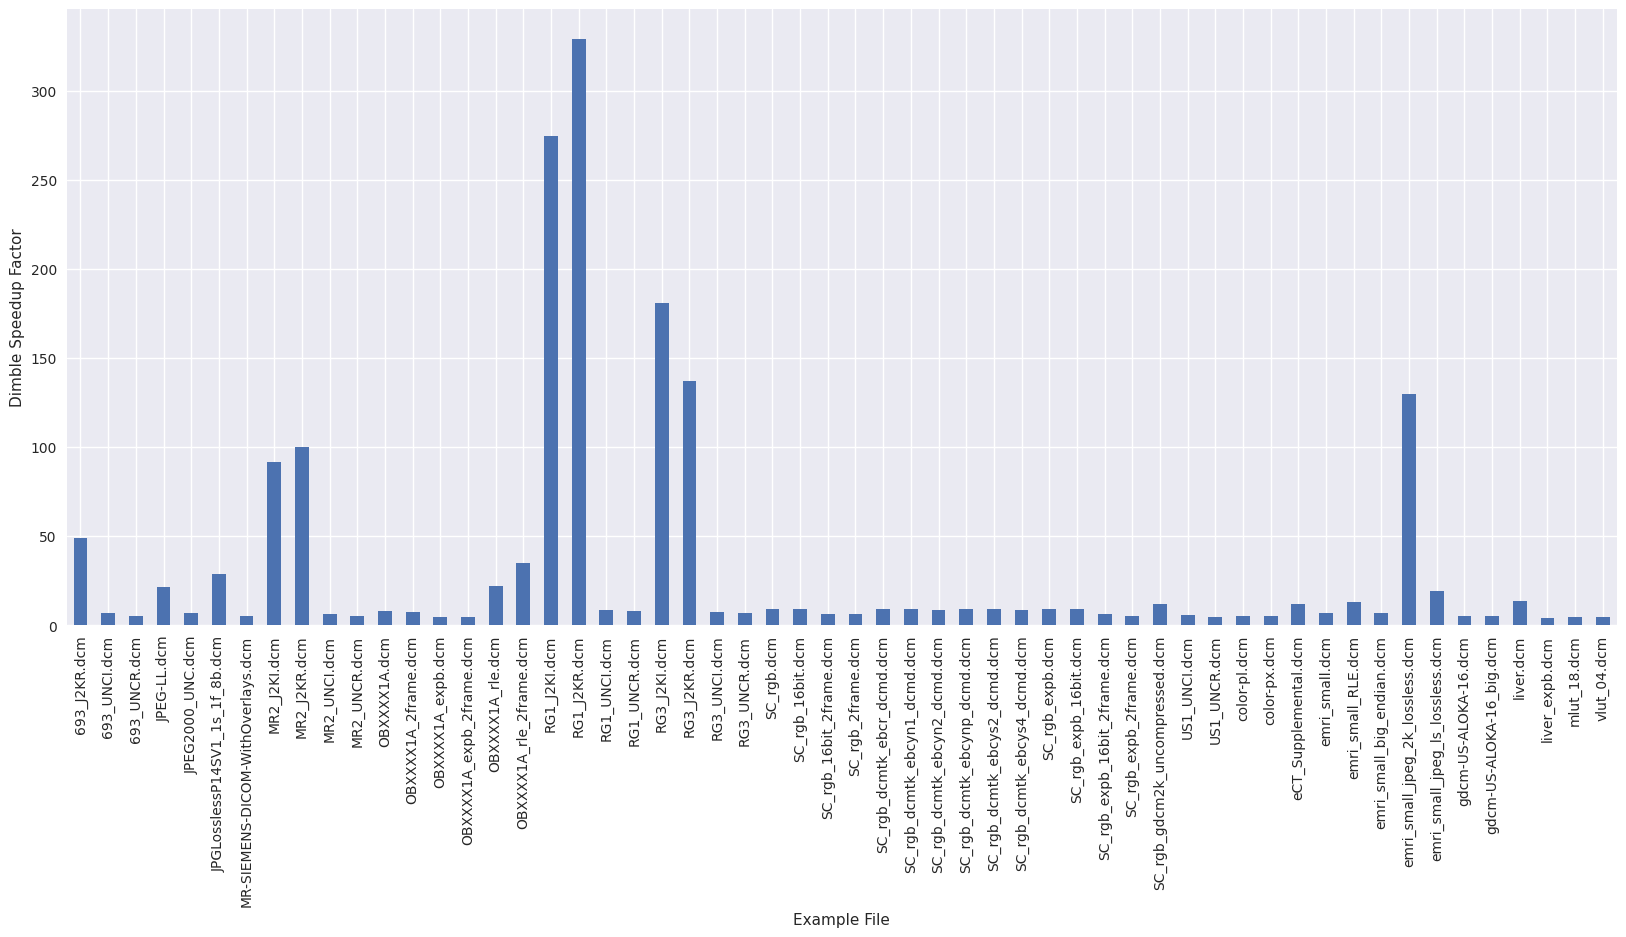

In [58]:
fig, ax = plt.subplots(figsize=(20, 8))
speedups.plot.bar(ax=ax)
ax.set_ylabel("Dimble Speedup Factor")
ax.set_xlabel("Example File")

In [61]:
speedups.describe().round(2)

count     56.00
mean      31.08
std       64.01
min        4.02
25%        5.73
50%        8.26
75%       13.46
max      329.51
dtype: float64

In [64]:
speedups.median()

8.255566963388068

In [63]:
speedups.mean()

31.08230768490863